# Install and Import Necessary Libraries

In [ ]:
#pip install pandas numpy matplotlib seaborn scikit-learn scipy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AffinityPropagation, Birch, DBSCAN, MiniBatchKMeans

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.shape

(2240, 29)

# Descriptive Statistics

In [ ]:
print("\nBasic Statistical Summary:")
df.describe()


Basic Statistical Summary:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


# Pre-Processing

In [ ]:
df = df.dropna()

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='coerce')

In [ ]:
categorical_cols = ['Education', 'Marital_Status']
df[categorical_cols] = df[categorical_cols].astype('category')

In [ ]:
numeric_cols = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [ ]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# EDA

### Distribution of Income

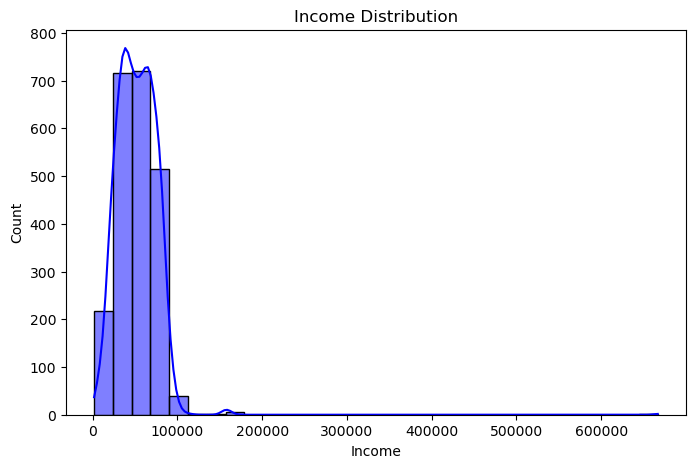

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

### Distribution of Recency

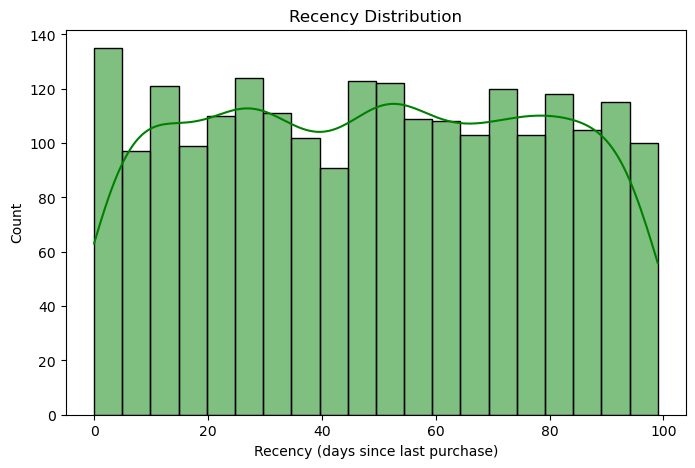

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Recency'], bins=20, kde=True, color='green')
plt.title('Recency Distribution')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Count')
plt.show()

### Count plot for Education levels

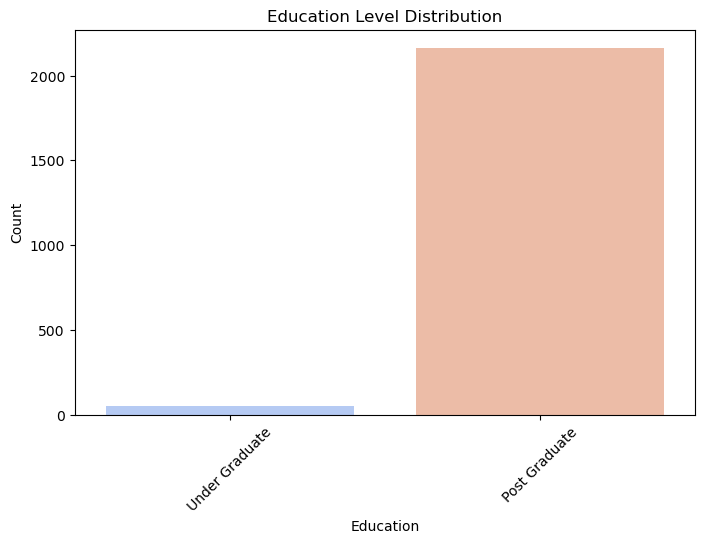

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', data=df, palette='coolwarm')
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Count plot for Marital Status

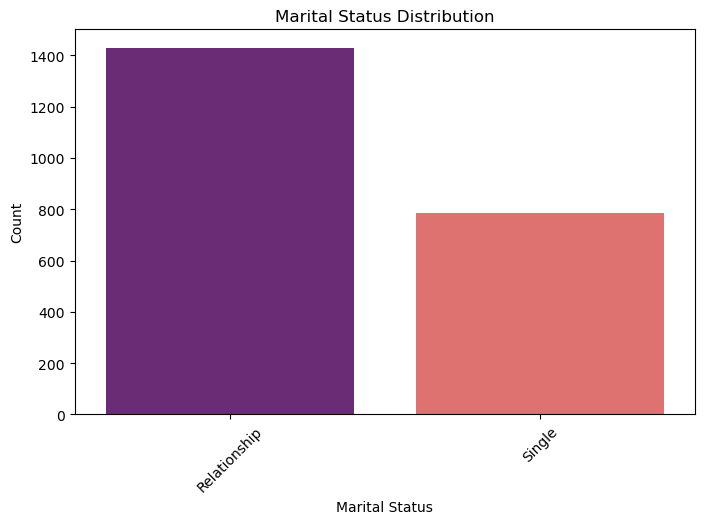

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Marital_Status', data=df, palette='magma')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Income vs Total Amount Spent

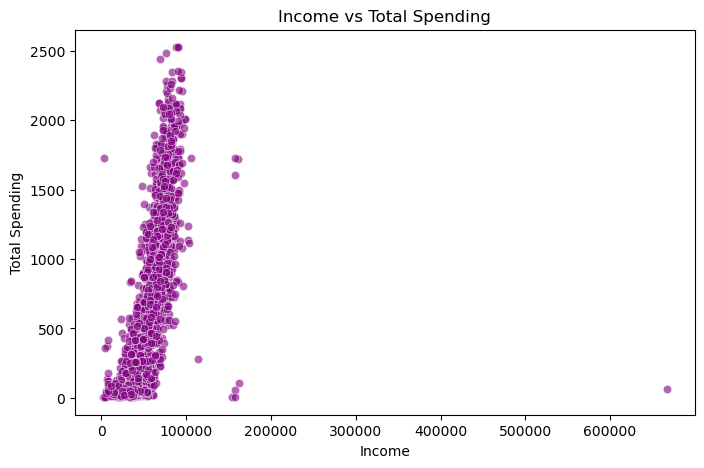

In [ ]:
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Income'], y=df['Total_Spending'], alpha=0.6, color='purple')
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

### Recency vs Total Spending

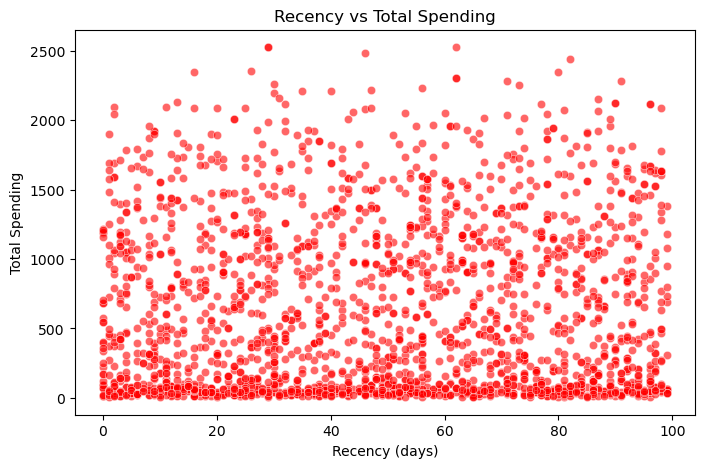

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Recency'], y=df['Total_Spending'], alpha=0.6, color='red')
plt.title('Recency vs Total Spending')
plt.xlabel('Recency (days)')
plt.ylabel('Total Spending')
plt.show()

### Boxplot of Spending by Education Level

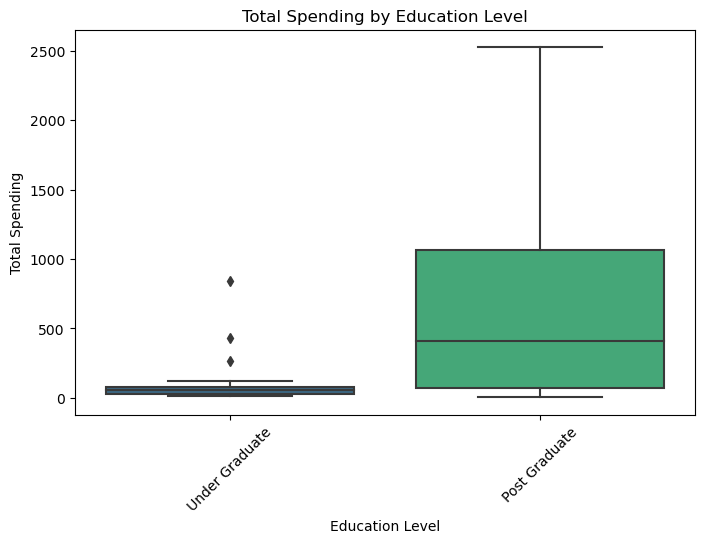

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='Total_Spending', data=df, palette='viridis')
plt.title('Total Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

### Spending Behavior Analysis

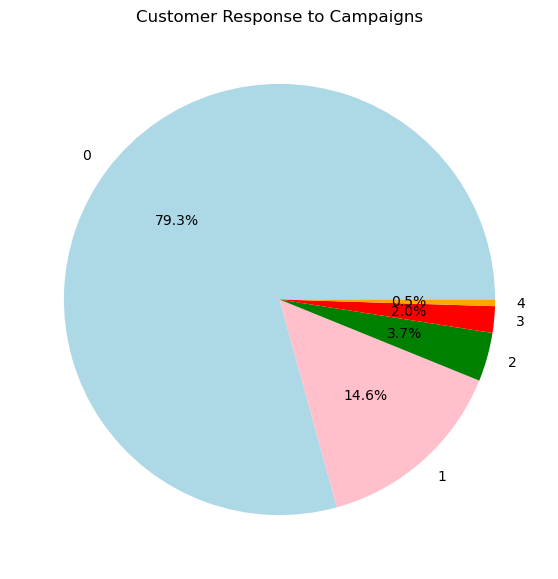

In [ ]:
campaign_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
df['Total_Campaigns_Accepted'] = df[campaign_cols].sum(axis=1)

plt.figure(figsize=(7, 7))
df['Total_Campaigns_Accepted'].value_counts().plot.pie(autopct="%1.1f%%", colors=['lightblue', 'pink', 'green', 'red', 'orange'])
plt.title('Customer Response to Campaigns')
plt.ylabel('')
plt.show()

### Distribution of Number of Web Visits

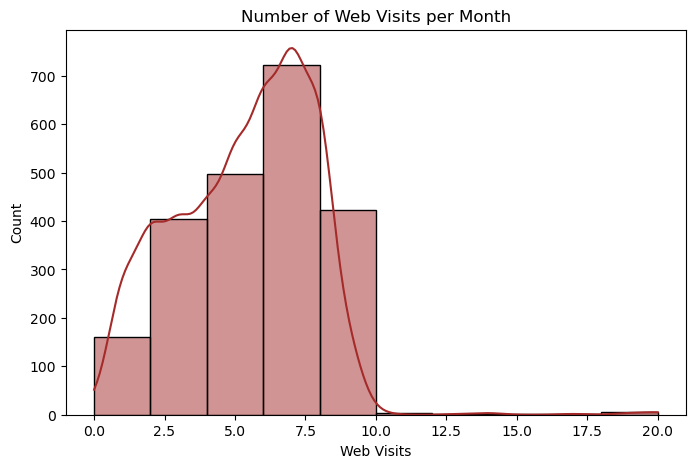

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['NumWebVisitsMonth'], bins=10, kde=True, color='brown')
plt.title('Number of Web Visits per Month')
plt.xlabel('Web Visits')
plt.ylabel('Count')
plt.show()

### Favourable Month for customer acquistion

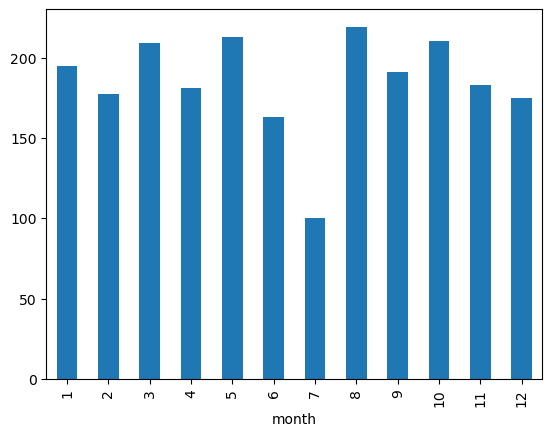

In [ ]:
df["month"] = df["Dt_Customer"].dt.month
df["year"] = df["Dt_Customer"].dt.year
fav_month = df.groupby("month").ID.count().plot(kind="bar")

# Clustering Algorithms

In [ ]:
X = df[['Income', 'Recency', 'Total_Spending', 'NumWebVisitsMonth']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Affinity Propagation Clustering

In [ ]:
affinity_model = AffinityPropagation(random_state=42)
affinity_model.fit(X_scaled)

AffinityPropagation(random_state=42)

In [ ]:
affinity_labels = affinity_model.labels_

In [ ]:
n_clusters = len(np.unique(affinity_labels))
print(f"Number of clusters found by Affinity Propagation: {n_clusters}")

sil_score = silhouette_score(X_scaled, affinity_labels)
print(f"Silhouette Score for Affinity Propagation: {sil_score:.3f}")

Number of clusters found by Affinity Propagation: 72
Silhouette Score for Affinity Propagation: 0.210


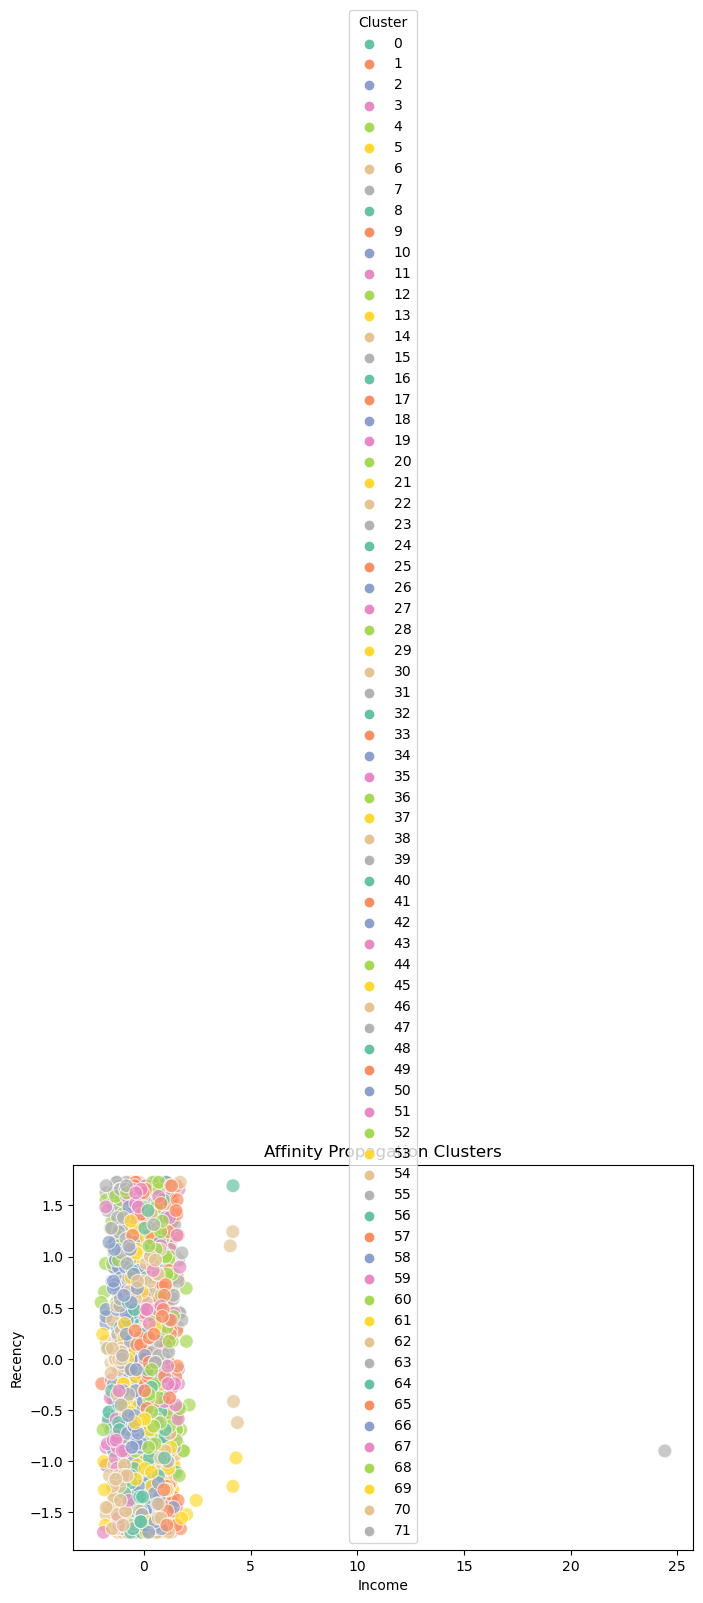

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=affinity_labels, palette='Set2', s=100, alpha=0.7)
plt.title('Affinity Propagation Clusters')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.legend(title='Cluster')
plt.show()

### BIRCH Clustering

In [ ]:
birch_model = Birch(n_clusters=None, threshold=0.5)
birch_model.fit(X_scaled)

Birch(n_clusters=None)

In [ ]:
birch_labels = birch_model.predict(X_scaled)

In [ ]:
n_clusters_birch = len(np.unique(birch_labels))
print(f"Number of clusters found by BIRCH: {n_clusters_birch}")

sil_score_birch = silhouette_score(X_scaled, birch_labels)
print(f"Silhouette Score for BIRCH: {sil_score_birch:.3f}")

Number of clusters found by BIRCH: 187
Silhouette Score for BIRCH: 0.197


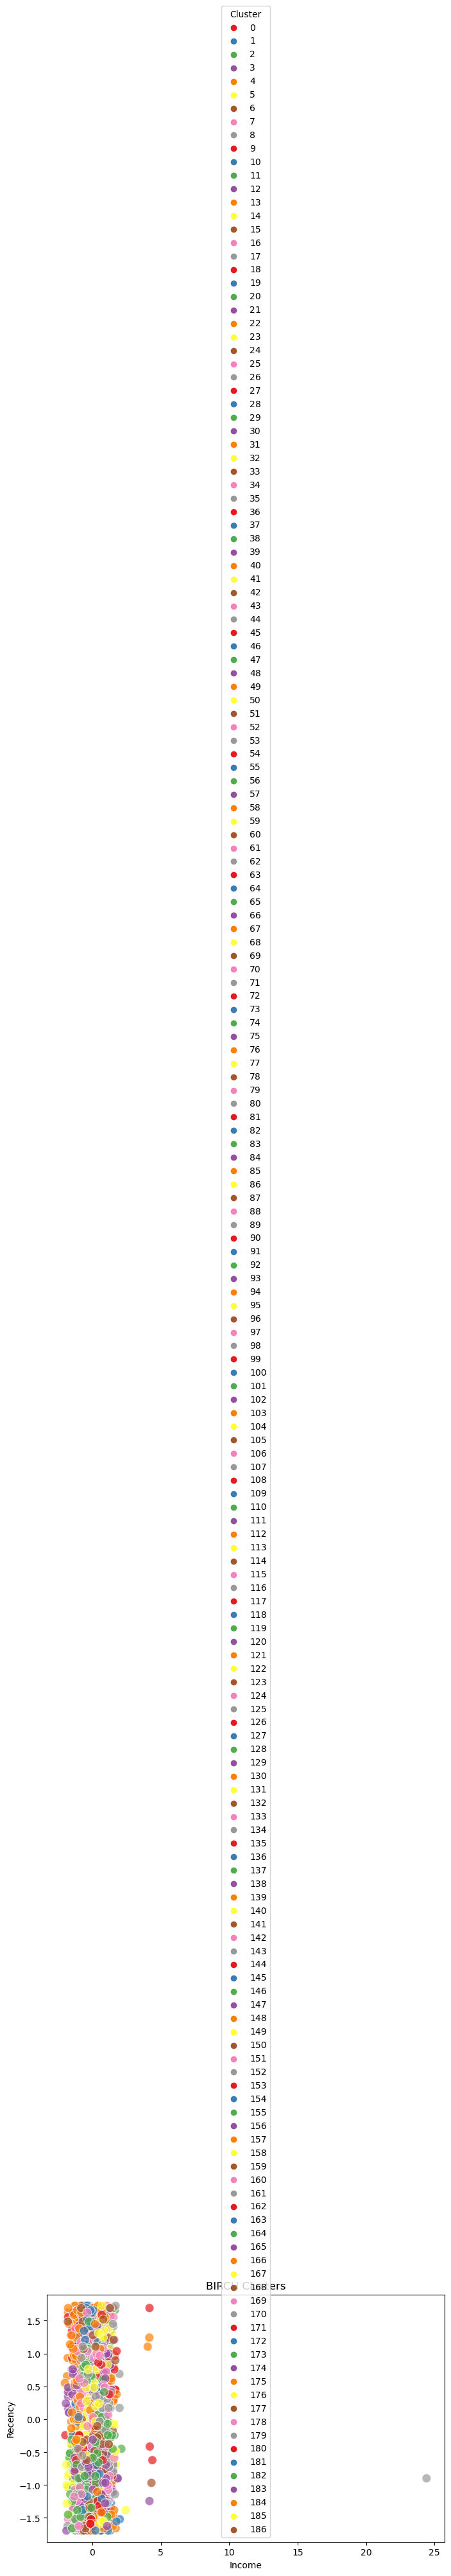

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=birch_labels, palette='Set1', s=100, alpha=0.7)
plt.title('BIRCH Clusters')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.legend(title='Cluster')
plt.show()

### DBSCAN Clustering

In [ ]:
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_scaled)

In [ ]:
n_clusters_dbscan = len(np.unique(dbscan_labels[dbscan_labels != -1]))
print(f"Number of clusters found by DBSCAN: {n_clusters_dbscan}")

sil_score_dbscan = silhouette_score(X_scaled, dbscan_labels) if n_clusters_dbscan > 1 else -1
print(f"Silhouette Score for DBSCAN: {sil_score_dbscan:.3f}")

Number of clusters found by DBSCAN: 3
Silhouette Score for DBSCAN: 0.032


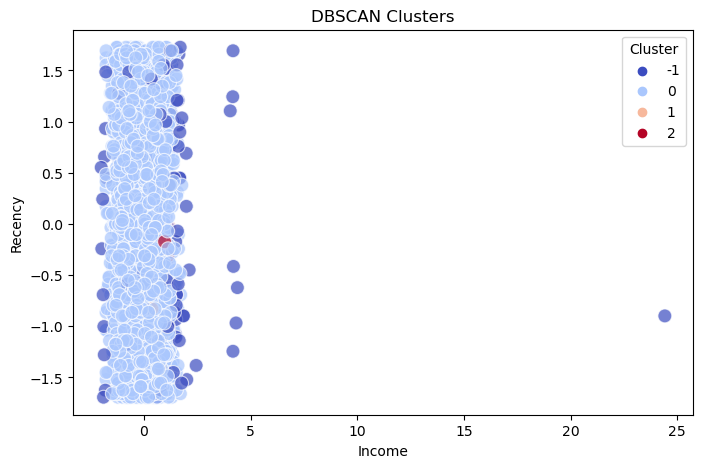

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='coolwarm', s=100, alpha=0.7, legend='full')
plt.title('DBSCAN Clusters')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.legend(title='Cluster')
plt.show()

### Mini-Batch K-Means Clustering

In [ ]:
kmeans_model = MiniBatchKMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

In [ ]:
n_clusters_kmeans = len(np.unique(kmeans_labels))
print(f"Number of clusters found by Mini-Batch K-Means: {n_clusters_kmeans}")

sil_score_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for Mini-Batch K-Means: {sil_score_kmeans:.3f}")

Number of clusters found by Mini-Batch K-Means: 5
Silhouette Score for Mini-Batch K-Means: 0.264


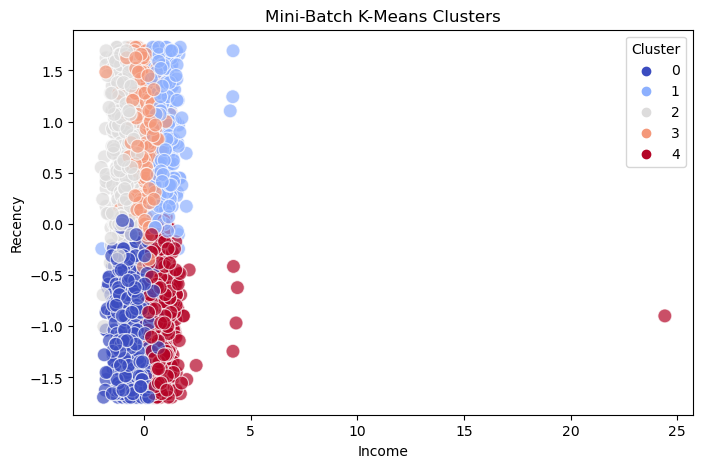

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='coolwarm', s=100, alpha=0.7)
plt.title('Mini-Batch K-Means Clusters')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.legend(title='Cluster')
plt.show()

# Best Model Identification

In [ ]:
silhouette_scores = {}
silhouette_scores['Affinity Propagation'] = sil_score
silhouette_scores['BIRCH'] = sil_score_birch
silhouette_scores['DBSCAN'] = sil_score_dbscan
silhouette_scores['Mini-Batch K-Means'] = sil_score_kmeans


best_model_name = max(silhouette_scores, key=silhouette_scores.get)
best_silhouette_score = silhouette_scores[best_model_name]

conclusion = f"""
Based on the silhouette scores, the best model for customer profiling is {best_model_name}, with a silhouette score of {best_silhouette_score:.3f}.
"""
print(conclusion)


Based on the silhouette scores, the best model for customer profiling is Mini-Batch K-Means, with a silhouette score of 0.264.



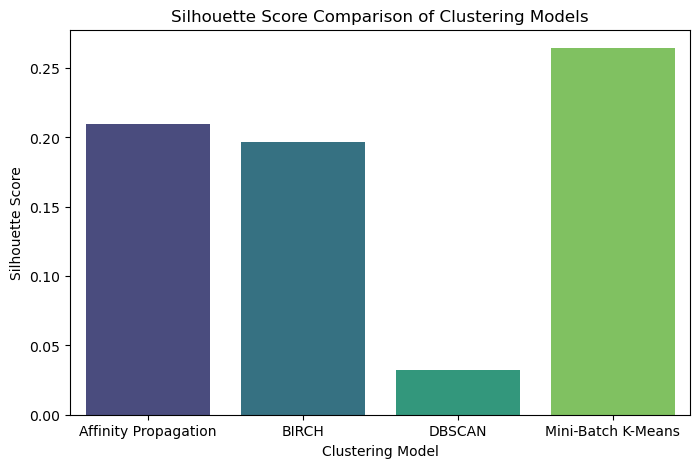

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(silhouette_scores.keys()), y=list(silhouette_scores.values()), palette='viridis')
plt.title('Silhouette Score Comparison of Clustering Models')
plt.xlabel('Clustering Model')
plt.ylabel('Silhouette Score')
plt.show()

# Customer's Cluster Profiling

In [ ]:
df['Cluster'] = kmeans_model.labels_

low_income_and_expenses = df[(df['Income'] < df['Income'].quantile(0.25)) & (df['Total_Spending'] < df['Total_Spending'].quantile(0.25))]

low_income_high_expenses = df[(df['Income'] < df['Income'].quantile(0.25)) & (df['Total_Spending'] > df['Total_Spending'].quantile(0.75))]

high_income_low_expenses = df[(df['Income'] > df['Income'].quantile(0.75)) & (df['Total_Spending'] < df['Total_Spending'].quantile(0.25))]

high_income_high_expenses = df[(df['Income'] > df['Income'].quantile(0.75)) & (df['Total_Spending'] > df['Total_Spending'].quantile(0.75))]

In [ ]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending,Total_Campaigns_Accepted,month,year,Cluster
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,1617,0,9,2012,1
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,27,0,3,2014,0
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,776,0,8,2013,4
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,53,0,2,2014,0
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,422,0,1,2014,3


In [ ]:
total_customers = len(df)

low_income_and_expenses_pct = (len(low_income_and_expenses) / total_customers) * 100
low_income_high_expenses_pct = (len(low_income_high_expenses) / total_customers) * 100
high_income_low_expenses_pct = (len(high_income_low_expenses) / total_customers) * 100
high_income_high_expenses_pct = (len(high_income_high_expenses) / total_customers) * 100

report = f"""
# 📊 **Customer Segmentation Report**



## 🏦 1. Sensible Customers (Low Income, Low Expenses)
🔹 **Number of Customers:** {len(low_income_and_expenses)} ({low_income_and_expenses_pct:.2f}%)
🔹 These customers exhibit a cautious financial approach, balancing both low income and low spending effectively.

---

## ⚠️ 2. Careless Customers (Low Income, High Expenses)
🔸 **Number of Customers:** {len(low_income_high_expenses)} ({low_income_high_expenses_pct:.2f}%)
🔸 These customers have **low income but high expenses**, potentially indicating **financial risk** or **poor budgeting habits**.

---

## 💰 3. High Income, Low Expenses Customers
🟢 **Number of Customers:** {len(high_income_low_expenses)} ({high_income_low_expenses_pct:.2f}%)
🟢 These customers demonstrate **financial prudence**, maintaining low expenses despite having a **high income**, suggesting strong savings potential.

---

## 🎭 4. High Income, High Expenses Customers
🟠 **Number of Customers:** {len(high_income_high_expenses)} ({high_income_high_expenses_pct:.2f}%)
🟠 These customers enjoy a **high standard of living**, with **both high income and high spending**, possibly indulging in luxury goods or premium services.

🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦
"""

from IPython.display import display, Markdown
display(Markdown(report))



# 📊 **Customer Segmentation Report**  



## 🏦 1. Sensible Customers (Low Income, Low Expenses)  
🔹 **Number of Customers:** 364 (16.43%)  
🔹 These customers exhibit a cautious financial approach, balancing both low income and low spending effectively.  

---

## ⚠️ 2. Careless Customers (Low Income, High Expenses)  
🔸 **Number of Customers:** 1 (0.05%)  
🔸 These customers have **low income but high expenses**, potentially indicating **financial risk** or **poor budgeting habits**.  

---

## 💰 3. High Income, Low Expenses Customers  
🟢 **Number of Customers:** 4 (0.18%)  
🟢 These customers demonstrate **financial prudence**, maintaining low expenses despite having a **high income**, suggesting strong savings potential.  

---

## 🎭 4. High Income, High Expenses Customers  
🟠 **Number of Customers:** 410 (18.50%)  
🟠 These customers enjoy a **high standard of living**, with **both high income and high spending**, possibly indulging in luxury goods or premium services.  

🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦


In [ ]:
min_income = df['Income'].min()
max_income = df['Income'].max()
mean_income = df['Income'].mean()

min_expenses = df['Total_Spending'].min()
max_expenses = df['Total_Spending'].max()
mean_expenses = df['Total_Spending'].mean()

post_graduate_rate = (df['Education'] == 'Post Graduate').mean() * 100
in_relationship_rate = (df['Marital_Status'] == 'Relationship').mean() * 100
one_kid_rate = (df['Kidhome'] == 1).mean() * 100
campaign_accepted_rate = (df['AcceptedCmp1'] == 0).mean() * 100

df['CustomerAge'] = pd.to_datetime(df['Dt_Customer']).dt.year - df['Year_Birth']
avg_customer_age = df['CustomerAge'].mean()

# Cluster summary statistics
cluster_summary = df.groupby('Cluster').agg(
    customer_count=('Cluster', 'size'),
    mean_income=('Income', 'mean'),
    mean_expenses=('Total_Spending', 'mean'),
    mean_age=('CustomerAge', 'mean')
)

# Create a structured report
report = f"""
# 📊 **Overall Customer Insights Report**

🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦

## 💰 Income Statistics
- **Minimum Income:** {min_income:,.2f}

- **Maximum Income:** {max_income:,.2f}

- **Average Income:** {mean_income:,.2f}

## 🛍️ Expense Statistics
- **Minimum Expenses:** {min_expenses:,.2f}

- **Maximum Expenses:** {max_expenses:,.2f}

- **Average Expenses:** {mean_expenses:,.2f}

## 🎓 Demographic Insights
- **Post-graduate Customers:** {post_graduate_rate:.2f}%

- **Customers in a Relationship:** {in_relationship_rate:.2f}%

- **Customers with One Kid:** {one_kid_rate:.2f}%

- **Customers Who Rejected Campaign:** {campaign_accepted_rate:.2f}%

- **Average Customer Age:** {avg_customer_age:.2f} years

## 🔍 **Cluster-Based Customer Segmentation**
{cluster_summary.to_markdown()}

🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦

"""

from IPython.display import display, Markdown
display(Markdown(report))



# 📊 **Overall Customer Insights Report**

🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦  

## 💰 Income Statistics
- **Minimum Income:** 1,730.00

- **Maximum Income:** 666,666.00

- **Average Income:** 52,247.25

## 🛍️ Expense Statistics
- **Minimum Expenses:** 5.00

- **Maximum Expenses:** 2,525.00

- **Average Expenses:** 607.08

## 🎓 Demographic Insights
- **Post-graduate Customers:** 97.56%

- **Customers in a Relationship:** 64.53%

- **Customers with One Kid:** 40.03%

- **Customers Who Rejected Campaign:** 93.59%

- **Average Customer Age:** 44.21 years

## 🔍 **Cluster-Based Customer Segmentation**
|   Cluster |   customer_count |   mean_income |   mean_expenses |   mean_age |
|----------:|-----------------:|--------------:|----------------:|-----------:|
|         0 |              589 |       38043.7 |         200.769 |    42.3175 |
|         1 |              344 |       76383.2 |        1370     |    46.1221 |
|         2 |              432 |       29774.7 |         113.273 |    40.4699 |
|         3 |              440 |       53120   |         474.659 |    47.5955 |
|         4 |              411 |       75087.3 |        1211.59  |    45.618  |

🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦  

